<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/NeuralNetwork_ANN_classification_MnistDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks - Artificial Neural Network

 ANN consists of 3 layers – Input, Hidden and Output. The input layer accepts the inputs, the hidden layer processes the inputs, and the output layer produces the result. Essentially, each layer tries to learn certain weights.

ANN can be used to solve problems related to:

    Tabular data
    Image data
    Text data


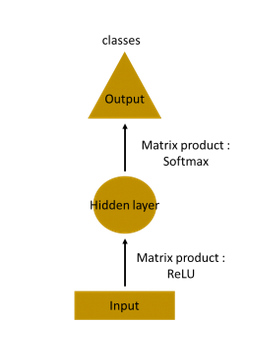

Activation Function :

    It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

The Activation Functions can be basically divided into 2 types-

1. Linear Activation Function 
2. Non-linear Activation Functions

Activation functions are a key part of neural network design.
The modern default activation function for hidden layers is the ReLU function.
The activation function for output layers depends on the type of prediction problem.

1. Activation Function for Hidden Layer :


    1. Rectified Linear Activation (ReLU)
    2. Logistic (Sigmoid)
    3. Hyperbolic Tangent (Tanh)

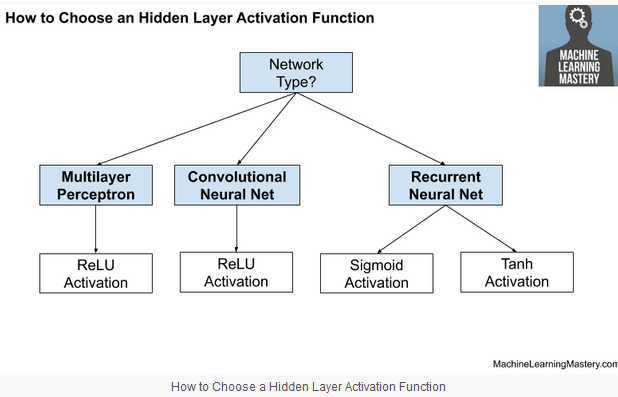

2. Activation Function for Output Layer :



    1. Linear
    2. Logistic (Sigmoid)
    3. Softmax

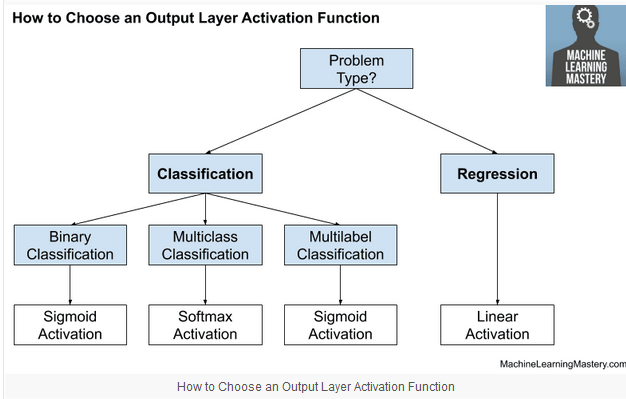

##MINST Digit Classification

In [37]:
#import all neecessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
# get data available im keras datasets
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [6]:
# Observe shapes of data
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(xtest.shape)
print(xtrain[0].shape)
print(ytrain[0].shape)



(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000, 28, 28)
(28, 28)
()


Coclusion :

    60000 images of 28x28 in training set 
    10000 images of 28x28 in testing set
    

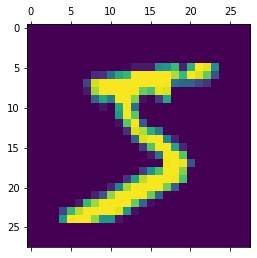

In [7]:
# Plot image using matplotlib
plt.matshow(xtrain[0])

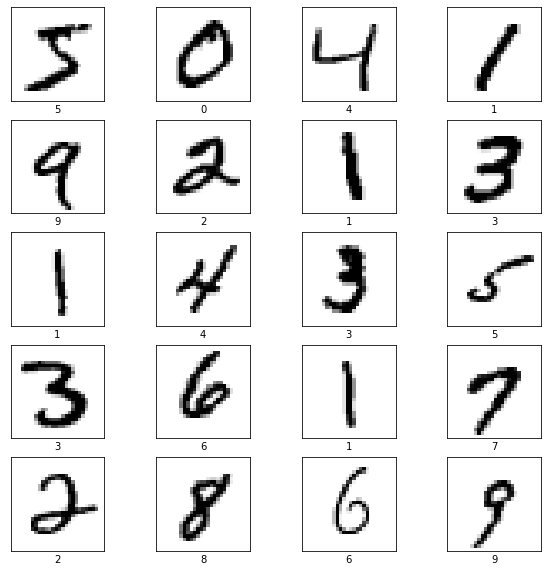

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i],cmap=plt.cm.binary)
  plt.xlabel(ytrain[i])
  plt.xticks([])
  plt.yticks([])

### Sequential Model with single layer

In [14]:
xtrain[0]  
# the darker area in matrix is weighted with number up to 256, every else is weighted as 0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
# Flatten the image array of each set which is imput to the model
xtrain_flatten = xtrain.reshape(len(xtrain),28*28)
xtest_flatten = xtest.reshape(len(xtest),28*28)
print(xtrain_flatten.shape)
print(xtest_flatten.shape)

(60000, 784)
(10000, 784)


In [16]:
xtest_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Conclusion :

    Now every image array is flattened and ready to fit in model

In [48]:
#Build model
model=keras.models.Sequential([
                                  #input_shape --> shape of image i.e. (784,1)
                                  #10 --> number of neurons. It should be equal to classes in llast layer.
                                  #In previous layer no. of neurons may be any number. 
                                  #Activation function --> is sigmoid. Always in last / output layer....used in classification.
                                  #In previous layers activation function is different. might be reLu, tanh
                      tf.keras.layers.Dense(10,input_shape=(784,) ,activation='sigmoid') 
])
#optimizer --> train efficiently in backword propogation
#loss --> how it calculates loss is as per classification or regression. here is categorical....regression uses mean_sqr_error and so on
#metrix --> 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),      #if (from_logits=True), Don't need to convert image into float
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(xtrain_flatten,ytrain,epochs=5) #epochs is number of iterations to compile model

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 3s 2ms/step - loss: 9.6783 - accuracy: 0.8406
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0506 - accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7591 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3986 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3745 - accuracy: 0.8861


In [50]:
model.evaluate(xtest_flatten,ytest)

 80/313 [======>.......................] - ETA: 0s - loss: 6.5073 - accuracy: 0.8684

/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 [==============================] - 1s 1ms/step - loss: 5.2209 - accuracy: 0.8934


[5.220915794372559, 0.8934000134468079]

Conclusion :

    Too much loss can be observed. We need to scale the input to reduce loss.

##Sequential model with scaled input

Including flatten layer and additional layer

In [53]:
#Scaled data

xtrain=xtrain/255.0
xtest=xtest/255.0

In [75]:
model=tf.keras.models.Sequential([
                      tf.keras.layers.Flatten(input_shape=(28,28)),     #flattens image array
                      tf.keras.layers.Dense(128,activation='relu'),
                      tf.keras.layers.Dense(10)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = model.fit(xtrain,ytrain,epochs=5) #epochs is number of iterations to compile model

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2607 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1170 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9851


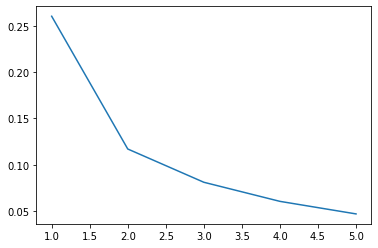

In [77]:
plt.plot(range(1,6),history.history["loss"])

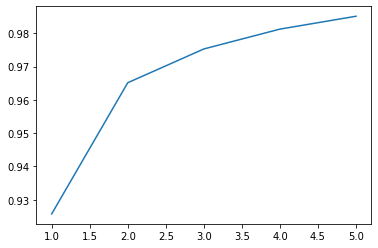

In [78]:
plt.plot(range(1,6),history.history["accuracy"])

predicted digit is : 7


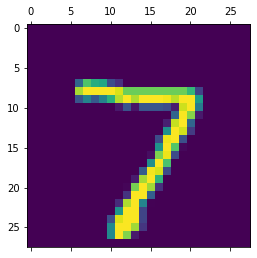

In [61]:
y_pred = model.predict(xtest)
print("predicted digit is :",np.argmax(y_pred[0]))
plt.matshow(xtest[0])

In [62]:
# Get argmax output for each 
ypredicted = [np.argmax(i) for i in y_pred]

In [63]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypredicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    3,    0,    2,    4,    2,    0,    4],
       [   0, 1124,    3,    1,    0,    1,    2,    1,    3,    0],
       [   2,    3, 1005,    0,    3,    1,    4,    8,    5,    1],
       [   0,    1,    5,  981,    1,   12,    0,    5,    3,    2],
       [   2,    0,    1,    0,  957,    0,    5,    3,    0,   14],
       [   2,    0,    0,    3,    0,  882,    1,    3,    1,    0],
       [   4,    3,    1,    1,    2,    9,  935,    0,    2,    1],
       [   0,    2,    4,    3,    1,    0,    0, 1016,    1,    1],
       [  10,    0,    2,    5,    5,    9,    4,    6,  927,    6],
       [   1,    4,    0,    4,    6,    2,    1,   14,    1,  976]],
      dtype=int32)>

Text(51.0, 0.5, 'Truth')

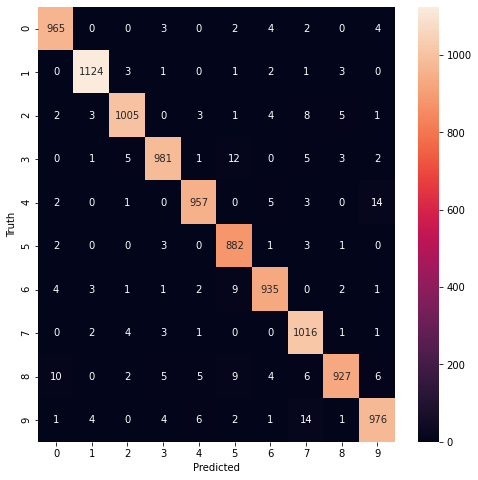

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

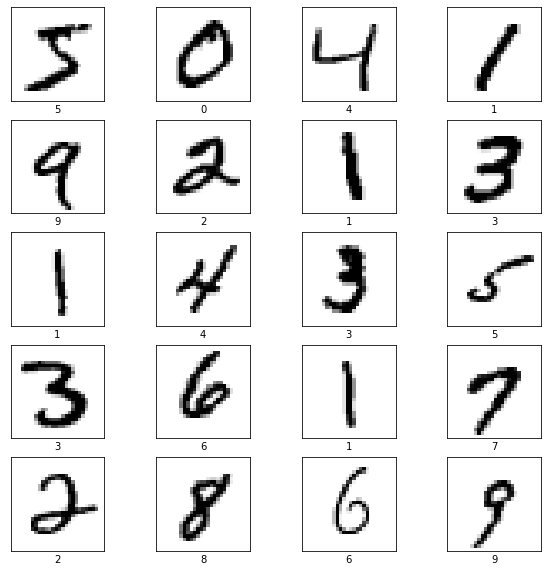

In [81]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i],cmap=plt.cm.binary)
  plt.xlabel(ytrain[i])
  plt.xticks([])
  plt.yticks([])